In [21]:
# 📚 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBClassifier


In [22]:
# 📥 Load Dataset (Synthetic HAR Dataset)
df = pd.read_csv('Synthetic_HAR_Dataset.csv')
df.head()


,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,Activity
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,...,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,WALKING_UPSTAIRS
1,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,...,-0.385082,-0.676922,0.611676,1.031000,0.931280,-0.839218,-0.309212,0.331263,0.975545,WALKING_UPSTAIRS
2,-0.479174,-0.185659,-1.106335,-1.196207,0.812526,1.356240,-0.072010,1.003533,0.361636,-0.645120,...,0.357113,1.477894,-0.518270,-0.808494,-0.501757,0.915402,0.328751,-0.529760,0.513267,SITTING
3,0.097078,0.968645,-0.702053,-0.327662,-0.392108,-1.463515,0.296120,0.261055,0.005113,-0.234587,...,-0.026514,0.060230,2.463242,-0.192361,0.301547,-0.034712,-1.168678,1.142823,0.751933,STANDING
4,0.791032,-0.909387,1.402794,-1.401851,0.586857,2.190456,-0.990536,-0.566298,0.099651,-0.503476,...,1.307143,-1.607483,0.184634,0.259883,0.781823,-1.236951,-1.320457,0.521942,0.296985,LAYING


In [23]:
# 🧹 Data Cleaning
print("Initial shape:", df.shape)
df.dropna(inplace=True)
print("Shape after dropping nulls:", df.shape)

Initial shape: (5000, 31)
Shape after dropping nulls: (5000, 31)


In [24]:
# 🎯 Label Encoding
le = LabelEncoder()
df['Activity'] = le.fit_transform(df['Activity'])


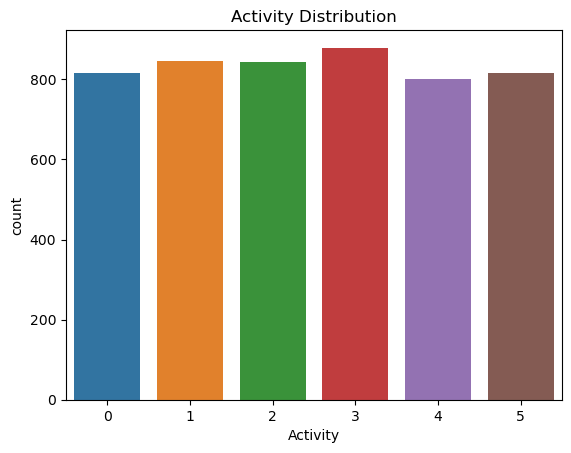

In [25]:
# 📊 Target Distribution
sns.countplot(x=df['Activity'])
plt.title("Activity Distribution")
plt.show()


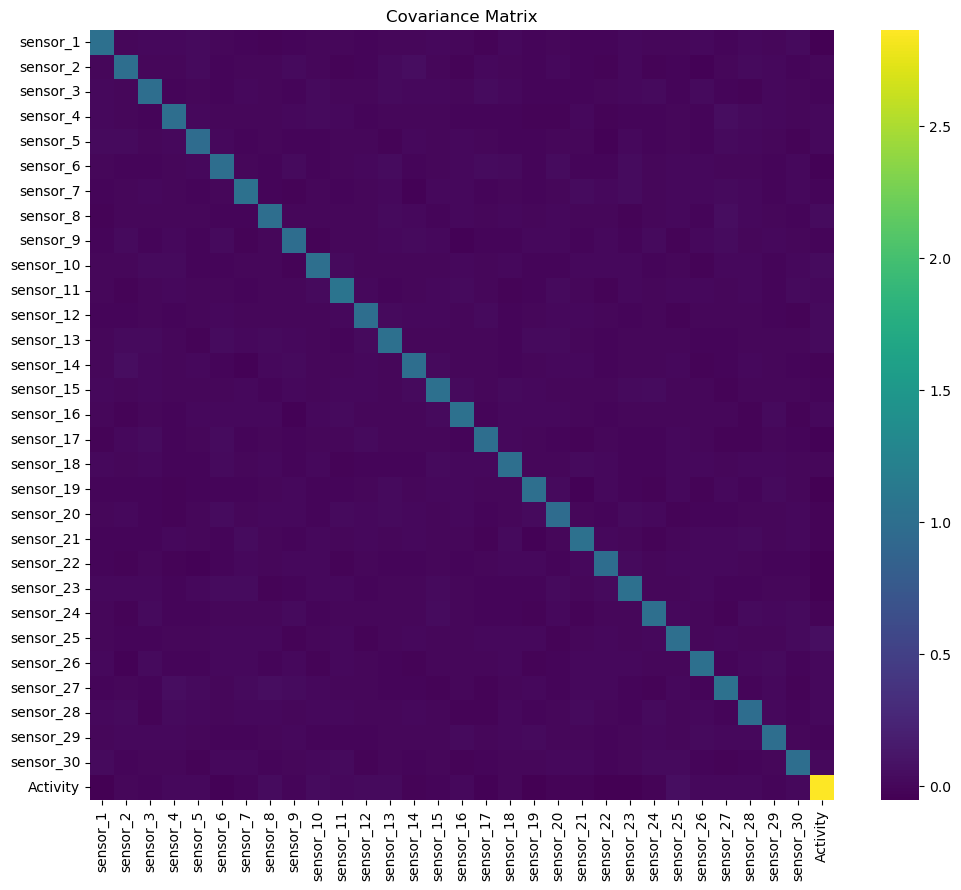

In [26]:
# 📈 Covariance Matrix
cov_matrix = df.cov()
plt.figure(figsize=(12, 10))
sns.heatmap(cov_matrix, cmap='viridis')
plt.title("Covariance Matrix")
plt.show()

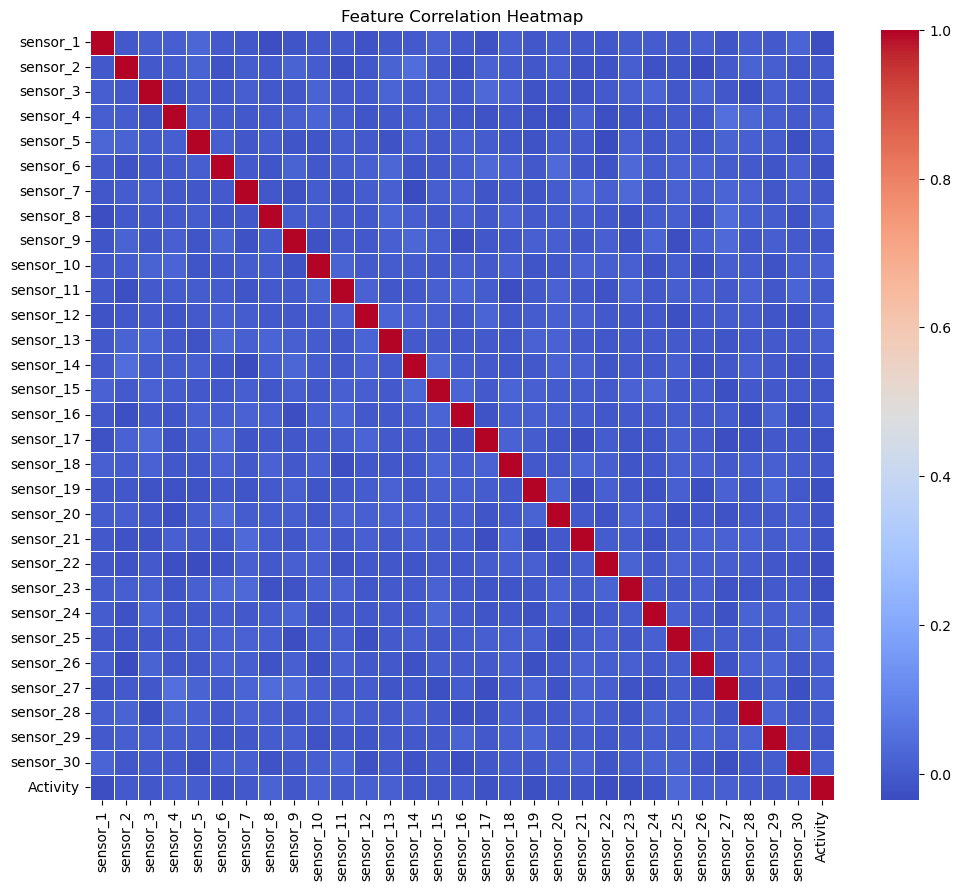

In [27]:
# 🔍 Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [28]:
# 🎯 Split Features and Labels
X = df.drop(['Activity'], axis=1)
y = df['Activity']

In [29]:
# 🔧 Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# ✅ Feature Selection - Top 20 features
selector = SelectKBest(score_func=f_classif, k=20)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = selector.get_support(indices=True)
print("Selected feature indices:", selected_features)

Selected feature indices: [ 0  1  4  5  6  7  8  9 12 15 16 18 19 20 21 22 23 24 26 29]


In [31]:
# 🧪 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, stratify=y, random_state=42)

In [32]:
# ⚙️ PCA
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X_selected)


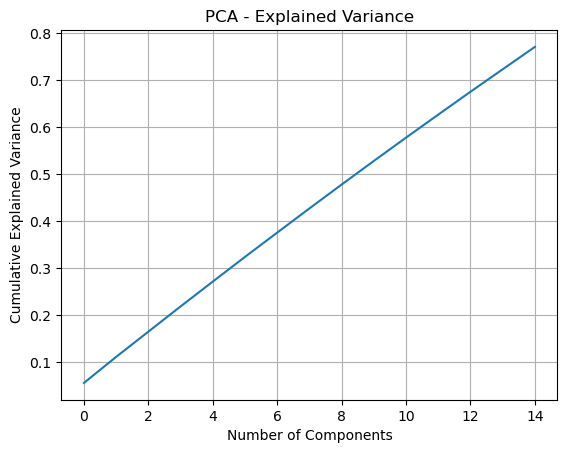

In [33]:
# 📈 Explained Variance Plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
plt.grid(True)
plt.show()


--- Manual Gradient Descent Using HAR Data ---
Learned parameters (θ): [ 2.38512413 -0.12908175]
Equation: y = -0.13x + 2.39


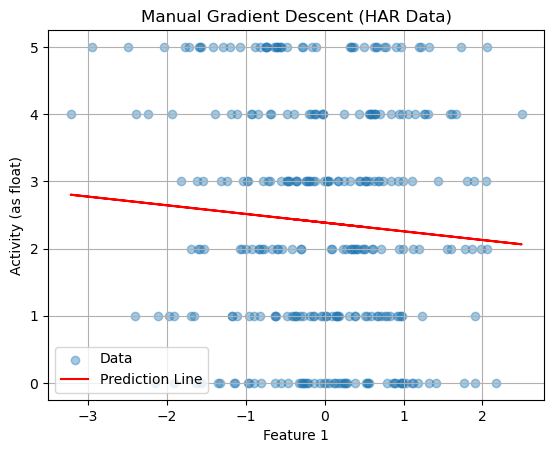

In [42]:
# 🧮 Manual Gradient Descent (y = mx + c) using HAR dataset
print("\n--- Manual Gradient Descent Using HAR Data ---")

# We'll use one feature and the activity label as regression target just for demo
# Pick first feature and convert Activity to float for regression
X_gd = df.iloc[:, 0].values.reshape(-1, 1)[:300]
y_gd = df['Activity'].values.reshape(-1, 1)[:300].astype(float)  # use fewer rows for fast demo

# Add bias term (x0 = 1)
X_b = np.c_[np.ones((X_gd.shape[0], 1)), X_gd]

# Initialize weights randomly
theta = np.random.randn(2, 1)

# Learning rate and iterations
eta = 0.01
n_iterations = 500
m = X_b.shape[0]

# Gradient Descent Loop
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y_gd)
    theta = theta - eta * gradients

print("Learned parameters (θ):", theta.ravel())
print("Equation: y = {:.2f}x + {:.2f}".format(theta[1][0], theta[0][0]))

# Plotting the regression line
plt.scatter(X_gd, y_gd, label="Data", alpha=0.4)
plt.plot(X_gd, X_b.dot(theta), color="red", label="Prediction Line")
plt.title("Manual Gradient Descent (HAR Data)")
plt.xlabel("Feature 1")
plt.ylabel("Activity (as float)")
plt.legend()
plt.grid(True)
plt.show()


In [34]:
# 🔢 Linear Regression
tl = LinearRegression()
tl.fit(X_train, y_train)
y_pred_lr = tl.predict(X_test)

In [36]:
# 📉 Regularization - Ridge & Lasso
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [37]:
# 📊 Evaluation Metrics
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Ridge R²:", ridge.score(X_test, y_test))
print("Lasso R²:", lasso.score(X_test, y_test))

Linear Regression R²: -0.002167502863966053
Linear Regression MAE: 1.4749351054831672
Linear Regression RMSE: 1.6941391653143827
Ridge R²: -0.0021649806043291253
Lasso R²: -8.729355038816777e-08


In [38]:
# 🚀 XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", xgb.score(X_test, y_test))

XGBoost Accuracy: 0.164


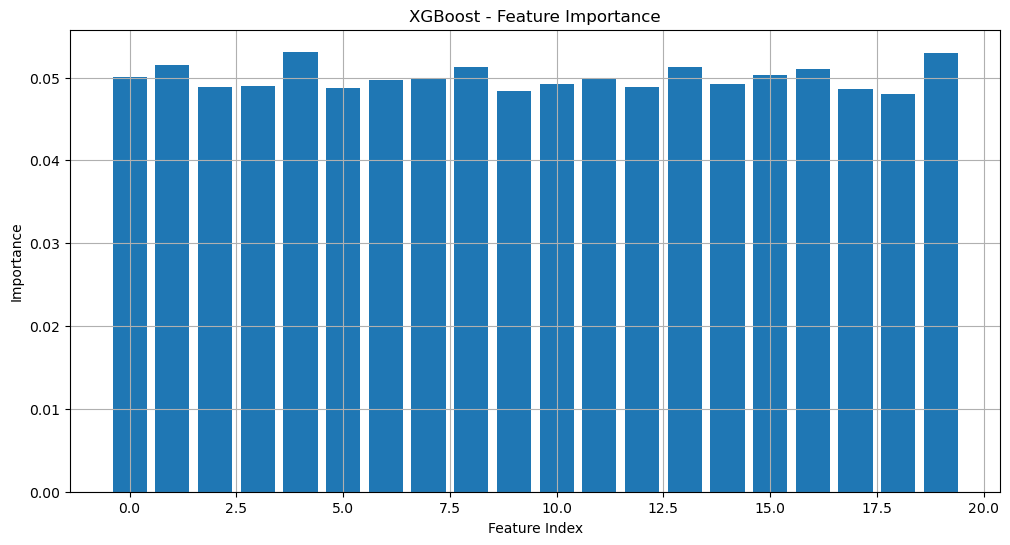

In [44]:
importances = xgb.feature_importances_
plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances)
plt.title("XGBoost - Feature Importance")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.grid(True)
plt.show()


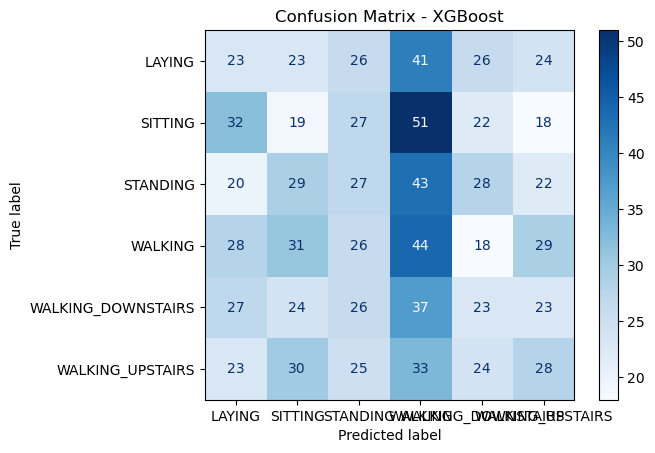

In [39]:
# 📉 Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - XGBoost")
plt.show()

In [40]:
# 🔁 Cross-Validation
scores = cross_val_score(xgb, X_selected, y, cv=5)
print("XGBoost Cross-validation scores:", scores)
print("Mean Accuracy:", scores.mean())

XGBoost Cross-validation scores: [0.166 0.174 0.184 0.178 0.175]
Mean Accuracy: 0.1754


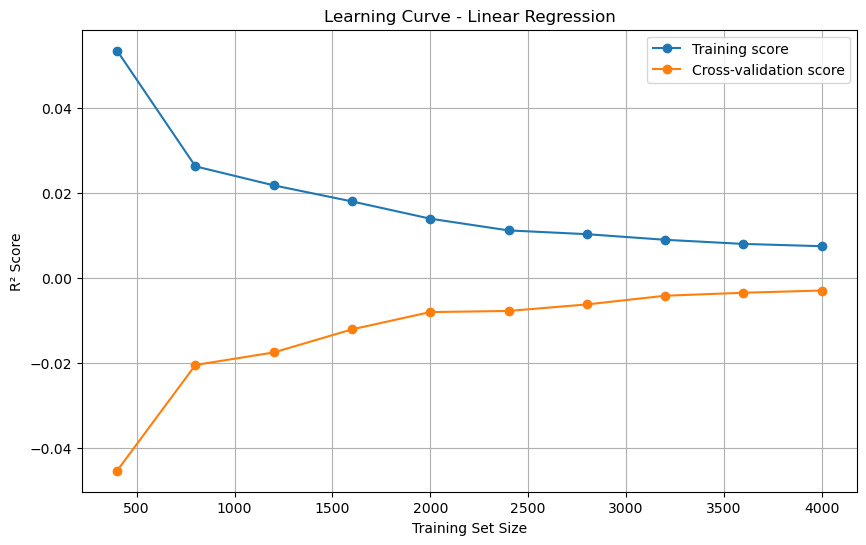

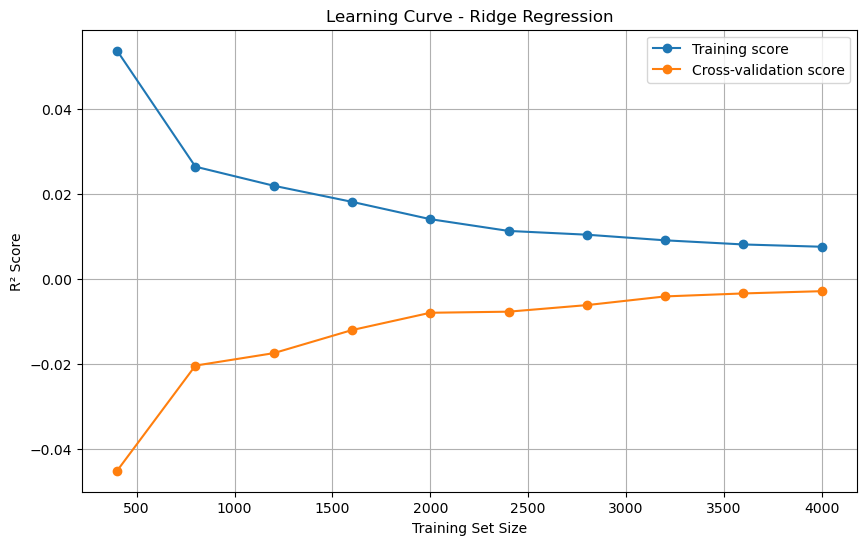

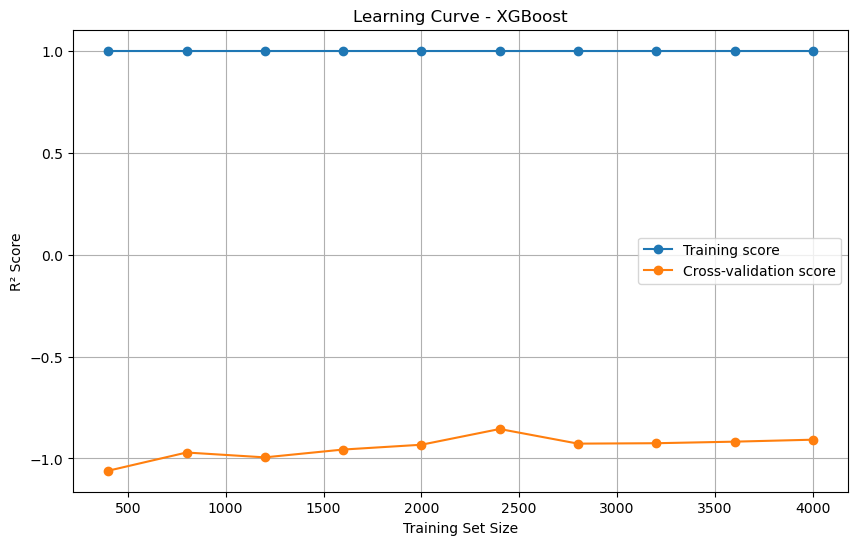

In [48]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring='r2', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
    )
    
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Training score", marker='o')
    plt.plot(train_sizes, test_mean, label="Cross-validation score", marker='o')
    
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("R² Score")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()
    
    # 📈 Learning Curves
plot_learning_curve(LinearRegression(), X_selected, y, title="Learning Curve - Linear Regression")
plot_learning_curve(Ridge(alpha=1.0), X_selected, y, title="Learning Curve - Ridge Regression")
plot_learning_curve(XGBClassifier(eval_metric='mlogloss'), X_selected, y, title="Learning Curve - XGBoost")



In [43]:

comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'XGBoost'],
    'R² Score': [
        r2_score(y_test, y_pred_lr),
        ridge.score(X_test, y_test),
        lasso.score(X_test, y_test),
        xgb.score(X_test, y_test)
    ],
    'MAE': [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, ridge.predict(X_test)),
        mean_absolute_error(y_test, lasso.predict(X_test)),
        mean_absolute_error(y_test, y_pred_xgb)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))),
        np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))),
        np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    ]
})

comparison_df.style.set_caption("🔍 Model Performance Comparison").format(precision=4)


,Model,R² Score,MAE,RMSE
0,Linear Regression,-0.0022,1.4749,1.6941
1,Ridge,-0.0022,1.4749,1.6941
2,Lasso,-0.0000,1.4810,1.6923
3,XGBoost,0.1640,1.8950,2.3467
